In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

In [2]:

df = pd.read_excel(r'D:/paper/qb/data/lab_data.xlsx')
df.head()


,River,W,S,Q,U,H,D50,D84,R,qs
0,Bogardi1,0.300,0.0104,0.02747,1.06,0.087,0.0068,0.00816,0.0721,24.1
1,Bogardi1,0.300,0.0141,0.01566,0.92,0.057,0.0068,0.00816,0.0504,6.1
2,Bogardi1,0.823,0.0143,0.02288,0.69,0.040,0.0068,0.00816,0.0389,0.2
3,Bogardi1,0.823,0.0145,0.04978,0.82,0.074,0.0068,0.00816,0.0709,21.9
4,Bogardi1,0.823,0.0153,0.03582,0.78,0.056,0.0068,0.00816,0.0535,1.8


In [3]:
df.describe()

,W,S,Q,U,H,D50,D84,R,qs
count,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000,1317.000000
mean,0.556500,0.022705,0.113250,0.929871,0.096134,0.006579,0.007895,0.083338,2625.613591
std,0.377787,0.038868,0.500064,0.466911,0.109170,0.008250,0.009899,0.094409,10394.566850
min,0.100000,0.000990,0.000500,0.220000,0.009000,0.000300,0.000360,0.008900,0.000000
25%,0.305000,0.003900,0.013880,0.600000,0.043000,0.001600,0.001920,0.039200,3.400000
50%,0.427000,0.009000,0.026050,0.830000,0.069000,0.003300,0.003960,0.060400,49.600000
75%,0.819000,0.016300,0.055950,1.130000,0.116000,0.009000,0.010800,0.099000,361.000000
max,2.000000,0.200000,4.613810,2.880000,1.092000,0.044300,0.053160,0.917300,103700.000000


In [4]:

X=df.loc[:, ['D84','D50','H','U','S']].values
y=df.loc[:, [ 'qs']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [5]:
np.shape(y_test)

(264, 1)

In [6]:
S=X_test[:,4]
D90=X_test[:,0]
D50=X_test[:,1]
h=X_test[:,2]
U=X_test[:,3 ]

In [7]:
import math
rhos = 2650    
rho = 1000
g=9.81
v=1.79*10**(-6)
s=rhos/rho
def cemenen_larson(D90,D50, h, U,S):
    ta=rho*g*h*S
    u_str=math.sqrt(ta/rho)
    ta_str=ta/(g*(rhos-rho)*D50)
    D_str=((s-1)*g/(v**2))**(1/3)*D50
    ta_str_c=0.3/(1+1.2*D_str)+0.055*(1-math.exp(-0.02*D_str))
    phi=12*ta_str**(3/2)*math.exp(-4.5*ta_str_c/ta_str)
    qsb=(g*(s-1)*D50**3)**0.5*phi
    qsb=qsb*(rhos-rho)*g*(1-0.4)
    return qsb*10**3

In [8]:
qsb_pred=np.zeros([len(D50),1])
for i in range(len(D50)):
    
    qsb_pred[i]=cemenen_larson(D90[i], D50[i], h[i], U[i],S[i])

In [9]:
y_pred=qsb_pred

In [10]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('MSE:', mse)

print('RMSE:', rmse)

r_squared = r2_score(y_test, y_pred)

print('R-squared:', r_squared)

mae = mean_absolute_error(y_test, y_pred)

print("Mean Absolute Error:", mae)

MSE: 229828137.2260699
RMSE: 15160.083681367656
R-squared: -0.6204633021828339
Mean Absolute Error: 4851.636356170678


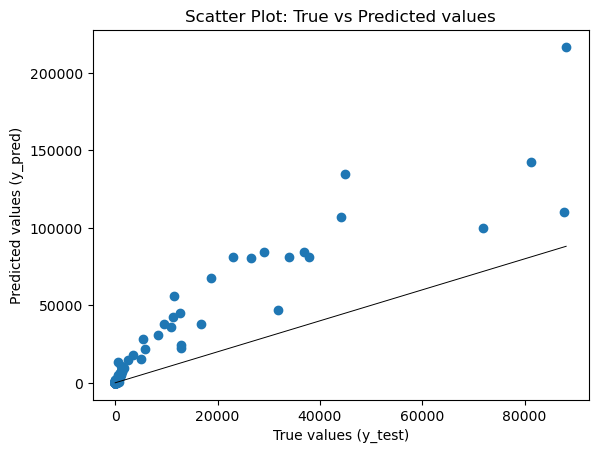

In [11]:
# Scatter plot
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='k', linewidth=0.7)
plt.xlabel('True values (y_test)')
plt.ylabel('Predicted values (y_pred)')
plt.title('Scatter Plot: True vs Predicted values')
plt.show()